In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.impute import SimpleImputer #Imputation transformer for completing missing values.
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # LabelEncoder Encode target labels with value between 0 and n_classes-1  #OneHotEncoder Encode categorical features as a one-hot numeric array.
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz  # Visualization

import warnings

# disable warnings
warnings.filterwarnings("ignore")



# About Dataset

This dataset contains about 10 years of daily weather observations from numerous Australian weather stations.

The target RainTomorrow means: Did it rain the next day? Yes or No.

Note: You should exclude the variable Risk-MM when training your binary classification model. If you don't exclude it, you will leak the answers to your model and reduce its predictability.

In [2]:
!wget https://raw.githubusercontent.com/codeforgirls-sa/ds/master/unit3/predictive-modeling-classification/weatherAUS.csv

dataset = pd.read_csv('weatherAUS.csv')

dataset.head()

zsh:1: command not found: wget


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [3]:
len(dataset.columns)

24

# EDA & Preprocessing

<AxesSubplot:>

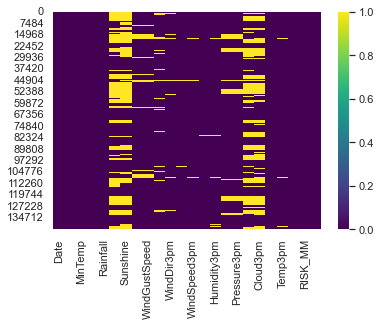

In [4]:
# check if there is any missing value
sns.set()
sns.heatmap(dataset.isnull(), cmap='viridis')


# Remove missing values

In [5]:
# remove missing values in numeric columns
imputer = SimpleImputer(missing_values= np.NAN, strategy= 'mean', fill_value=None, verbose=0, copy=True) #

df_num_col = ["MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine", "WindGustSpeed", "WindSpeed9am",
              "WindSpeed3pm", "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm", "Cloud9am", "Cloud3pm",
              "Temp9am", "Temp3pm"]

data_num = dataset[df_num_col]
imputer = imputer.fit(data_num)
dataset[df_num_col] = imputer.transform(data_num)

# Encoder for categorical variables 

In [6]:
label_encoder = LabelEncoder()
df_cat_col = ["WindGustDir", "WindDir9am", "WindDir3pm", "RainToday", "RainTomorrow", "Date", "Location"]

data_cat = dataset[df_cat_col].fillna('NA')


for i in range(len(data_cat.columns)):
    data_cat.iloc[:, i] = label_encoder.fit_transform(data_cat.iloc[:, i]) # DataFrame.iloc integer-location based indexing for selection by position.

dataset[df_cat_col] = data_cat

In [7]:
dataset['WindGustDir'].unique()

array([14, 15, 16,  5,  7,  3,  6, 13,  1, 11,  9,  8, 10,  2,  4,  0, 12])

<AxesSubplot:>

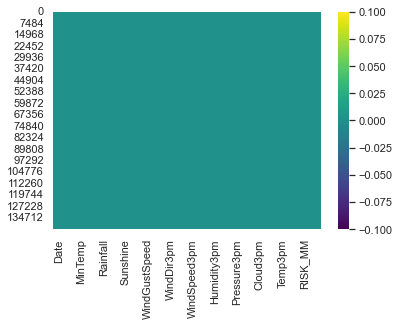

In [8]:
# check if there is any missing value
sns.set()
sns.heatmap(dataset.isnull(), cmap='viridis')

# Feature Engineering

We need to remove RISK_MM because we want to predict 'RainTomorrow' and RISK_MM can leak some info to our model[more](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package/discussion/78316)

In [9]:
# We need to remove RISK_MM because we want to predict 'RainTomorrow' and RISK_MM can leak some info to our model
dataset = dataset.drop('RISK_MM', axis=1)


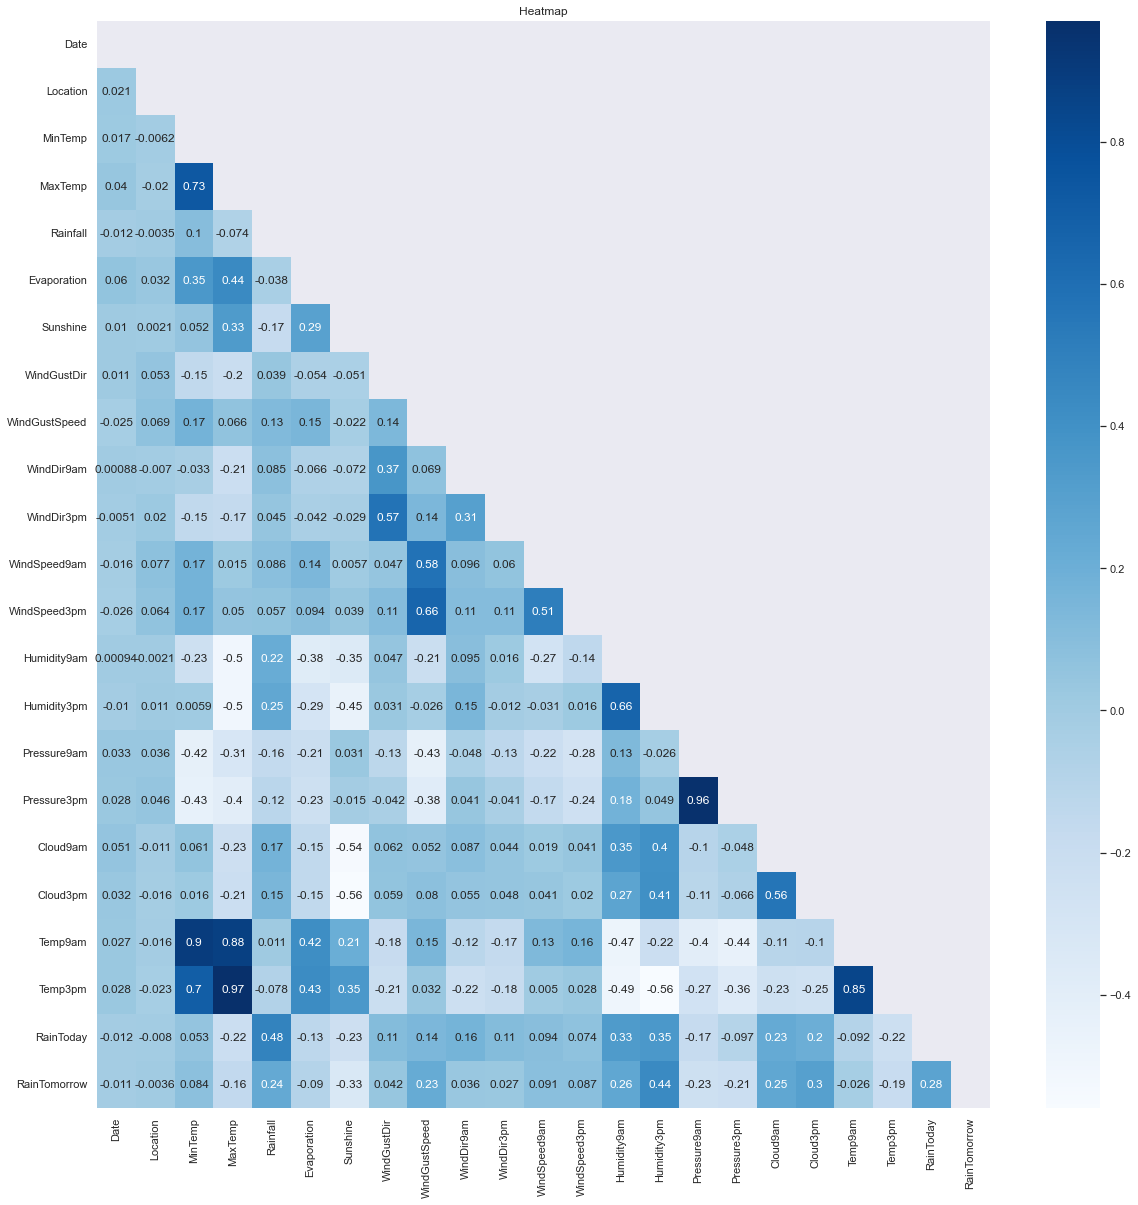

In [10]:
corr = dataset.corr()
mask = np.triu(np.ones_like(corr))
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(corr, cmap='Blues', annot=True, mask=mask).set_title('Heatmap');

# Predictive Modeling

In [23]:
features = dataset.iloc[:, 0:22].values
target = dataset.iloc[:, 22].values

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3)

clf = DecisionTreeClassifier(random_state=0, max_depth=14)

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Predictive Evaluation

In [24]:

print("Accuracy:", accuracy_score(y_test, y_pred)*100)


Accuracy: 82.35266538515637


# Result Visualization

KeyboardInterrupt: 

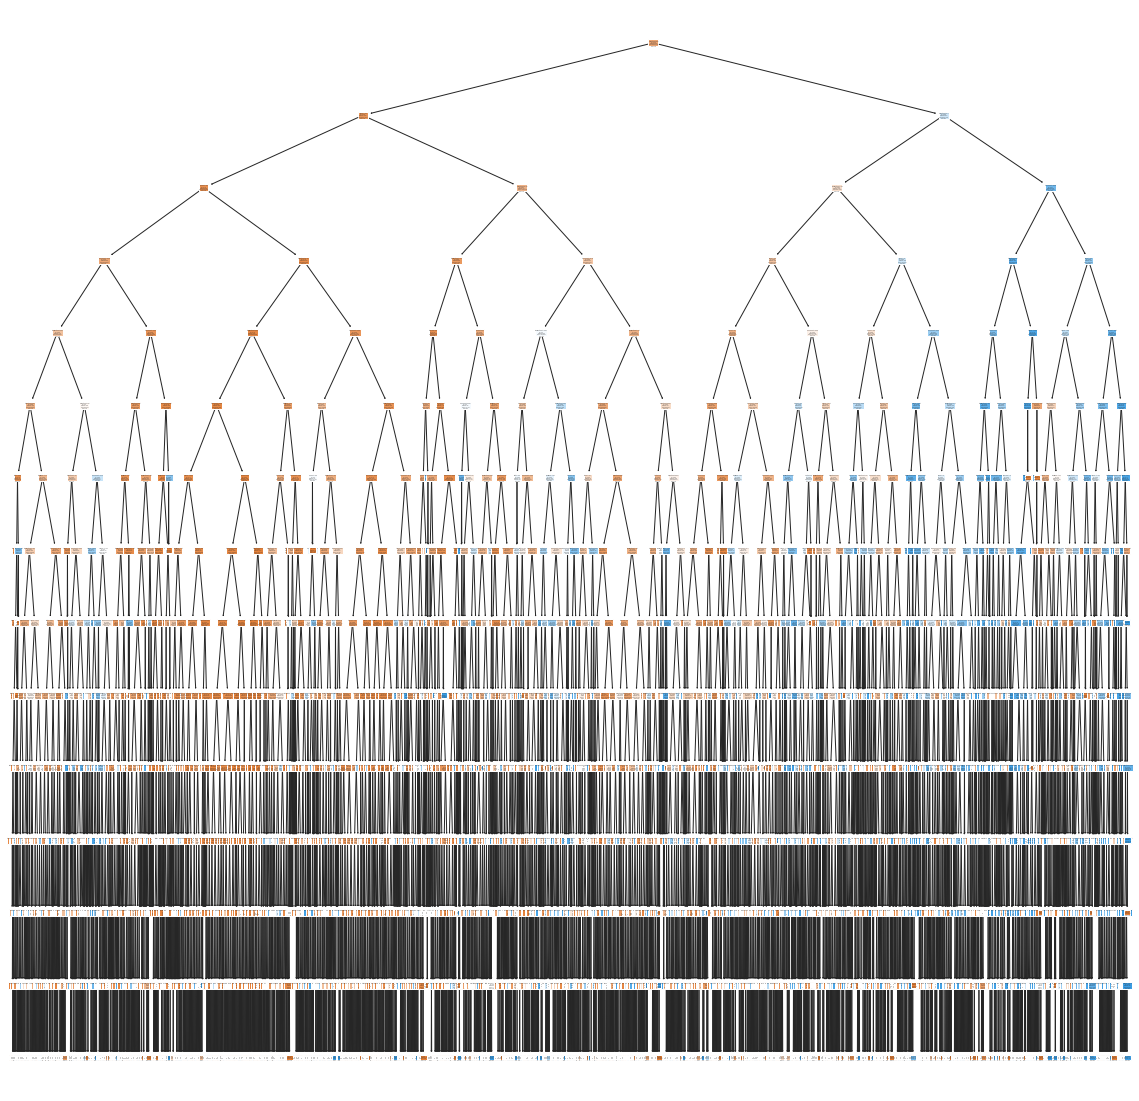

In [25]:
from sklearn import tree

plt.figure()
tree.plot_tree(clf,filled=True, feature_names = ["Date", "Location", "MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine",
                               "WindGustDir", "WindGustSpeed", "WindDir9am", "WindDir3pm", "WindSpeed9am",
                               "WindSpeed3pm", "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm", "Cloud9am",
                               "Cloud3pm", "Temp9am", "Temp3pm", "RainToday"],
                class_names=["Yes", "No"])  
plt.savefig('tree.eps',format='eps',bbox_inches = "tight")
